<a href="https://colab.research.google.com/github/RasheedaRasool/chatbot/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gaussian Distribution

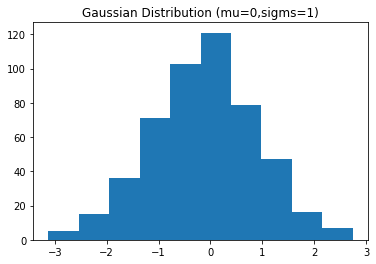

In [1]:
from random import gauss
import matplotlib.pyplot as plt

l = [gauss(0,1) for _ in range(500)]
plt.hist(l)
plt.title('Gaussian Distribution (mu=0,sigms=1)')
plt.show()


1.	Load the Global Land Temperature dataset as a list of lists. Before starting, take a moment to better inspect the attributes you are going to work on. How many of them are nominal, how many continuous or discrete?

In [2]:
import csv
col_names = []
dataset = [[], [], [], [], [], [], []]
with open('GLT_filtered.csv') as fp:
  reader = csv.reader(fp)
  col_names = next(reader)
  for cols in reader:
    if len(cols) == len(col_names): # every column must be present
      for i in range(len(dataset)):
        dataset[i].append(cols[i])

In [3]:
for i in range(4):
  for j in range(len(dataset)):
    print(f'{dataset[j][i]} ', end='')
  print('')

1849-01-01 26.704 1.435 Abidjan Côte D'Ivoire 5.63N 3.23W 
1849-02-01 27.434 1.3619999999999999 Abidjan Côte D'Ivoire 5.63N 3.23W 
1849-03-01   Abidjan Côte D'Ivoire 5.63N 3.23W 
1849-04-01 26.14 1.3869999999999998 Abidjan Côte D'Ivoire 5.63N 3.23W 


In [4]:
rows_c = len(dataset[1])
rows_c

219575

In [5]:
#Many of the columns are nominal, while there are two numerical 
#continuous attributes: AverageTemperature and AverageTemperatureUncertainty.

2.	Analyze the attribute AverageTemperature, which contains missing values.

In [6]:
def count_missing(data):
  return sum([1 for d in data if d == ''])
count = len(dataset[1])
print(f'AverageTemperature, missing values out of the whole dataset:,→{100*count_missing(dataset[1])/count:.1f}%')
print(f'AverageTemperatureUncertainty, missing values out of the whole dataset:,→{100*count_missing(dataset[2])/count:.1f}%')

AverageTemperature, missing values out of the whole dataset:,→12.6%
AverageTemperatureUncertainty, missing values out of the whole dataset:,→12.6%


In [7]:
def fill_gaps(data, cities):
  right_i = 0
  right_v = 0
  for i, value in enumerate(data):
    if i == 0 or cities[i] != cities[i-1]:
      left_v = 0
    else:
      left_v = data[i-1]
    # reuse the right_v value, useful when there are multiple consecutive␣,→missing values
    if i < right_i:
      data[i] = (left_v + right_v) / 2
      continue
    if value == '':
      for j in range(i+1, len(data)):
        if cities[j] != cities[i]: # this check must come before
          right_v = 0
          break
        elif data[j] != '':
          right_v = float(data[j])
          break
      if i == len(data)-1: # edge case: the last value of the last city␣,→is empty
          right_v = 0
          right_i = j
      data[i] = (left_v + right_v) / 2
    else:
       data[i] = float(data[i]) # parse to float all present value

In [8]:
l = ['', '12', '', '', '', '15', '']
c = ['Rome', 'Rome', 'Rome', 'Turin', 'Turin', 'Turin', 'Turin']
c
print('Original list:', l)
fill_gaps(l,c)
print('Filled list:', l)

Original list: ['', '12', '', '', '', '15', '']
Filled list: [6.0, 12.0, 6.0, 7.5, 11.25, 15.0, 7.5]


In [9]:
avg_temp = dataset[1]
avg_temp_unc = dataset[2]
cities = dataset[3]
fill_gaps(avg_temp, cities)
fill_gaps(avg_temp_unc, cities)
print('Missing values in AverageTemperature:', sum([1 for v in avg_temp if v =='']))
print('Missing values in AverageTemperatureUncertainty:', sum([1 for v in avg_temp_unc if v == '']))

Missing values in AverageTemperature: 0
Missing values in AverageTemperatureUncertainty: 0


In [10]:
with open('GLT_filtered_filled.csv', 'w') as fp:
  header = ','.join(col_names)
  fp.write(f'{header}\n')
  for i in range(rows_c):
    cols = []
    for j in range(len(dataset)):
      cols.append(str(dataset[j][i]))
    cols = ','.join(cols)
    fp.write(f'{cols}\n')

In [11]:
cities = set(dataset[3])
print('Number of distinct cities:', len(cities))

Number of distinct cities: 100


In [12]:
city_avg_temp = {}
city_avg_temp_unc = {}
for city in cities:
  idxs = [i for i, c in enumerate(dataset[3]) if c == city] # extract the␣,indices
  city_avg_temp[city] = [dataset[1][i] for i in idxs]
  city_avg_temp_unc[city] = [dataset[2][i] for i in idxs]

In [13]:
def fill_gaps(data):
  right_i = 0
  right_v = 0
  for i, value in enumerate(data):
    left_v = data[i-1] if i != 0 else 0
    # reuse the right_v value, useful when there are multiple consecutive␣,missing values
    if i < right_i:
      data[i] = (left_v + right_v) / 2
      continue
    if value == '':
      try:
        # use a generator to search for the first occurrence
        right_i, right_v = next((idx+i+1, float(v)) for idx, v in enumerate(data[i+1:]) if v != '')
      except StopIteration: # fired when the generator has no items left␣,to iterate on
        right_i = len(data)
        right_v = 0
      data[i] = (left_v + right_v) / 2
    else:
      data[i] = float(data[i]) # parse to float all present value

In [14]:
l = ['8', '', '3', '', '15', '', '']
print('Original list:', l)
fill_gaps(l)
print('Filled list:', l)

Original list: ['8', '', '3', '', '15', '', '']
Filled list: [8.0, 5.5, 3.0, 9.0, 15.0, 7.5, 3.75]


In [15]:
for city in cities:
  fill_gaps(city_avg_temp[city])
  fill_gaps(city_avg_temp_unc[city])


Version B

In [16]:
def print_hottest_coolest(city, N, city_avg_temp):
  srtd = sorted(city_avg_temp[city], reverse=True)
  print(f'The top {N} hottest measurements taken in {city} are:', srtd[:N])
  print(f'The top {N} coolest measurements taken in {city} are:', srtd[-1:-(N+1):-1])

In [17]:
print_hottest_coolest('Rome', 5, city_avg_temp)

The top 5 hottest measurements taken in Rome are: [25.951, 24.998, 24.873, 24.730999999999998, 24.48]
The top 5 coolest measurements taken in Rome are: [-1.4410000000000005, -1.3039999999999994, -1.0189999999999997, -0.871, -0.7829999999999999]


Exercise 1.4

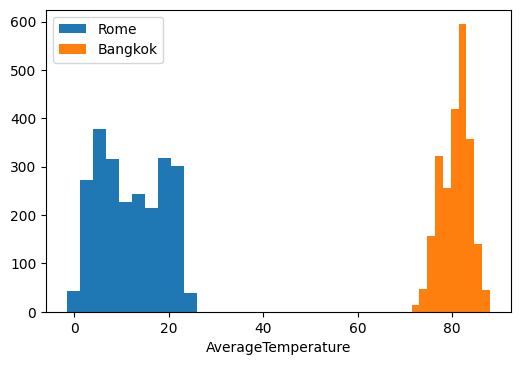

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
for city in ['Rome', 'Bangkok']:
  plt.hist(city_avg_temp[city], label=city)
plt.legend()
_ = plt.xlabel('AverageTemperature')

In [19]:
import numpy as np
print(f'Rome average temperature: {np.mean(city_avg_temp["Rome"]):.2f},Standard deviation: {np.std(city_avg_temp["Rome"]):.2f}')
print(f'Bangkok average temperature: {np.mean(city_avg_temp["Bangkok"]):.2f},Standard deviation: {np.std(city_avg_temp["Bangkok"]):.2f}')

Rome average temperature: 12.01,Standard deviation: 6.69
Bangkok average temperature: 80.73,Standard deviation: 3.04


Exercise 1.5

In [20]:
from IPython.display import Math

In [21]:
def fah2cel(deg_fah):
  return (deg_fah - 32) / 1.8

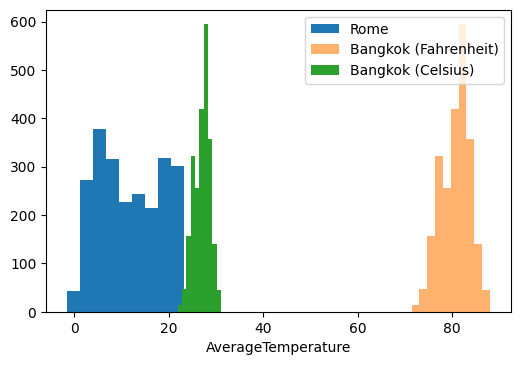

In [22]:
bang_celsius = [fah2cel(t) for t in city_avg_temp['Bangkok']]
plt.rcParams['figure.dpi'] = 100
plt.hist(city_avg_temp['Rome'], label='Rome')
plt.hist(city_avg_temp['Bangkok'], label='Bangkok (Fahrenheit)', alpha=0.6)
plt.hist(bang_celsius, label='Bangkok (Celsius)')
plt.legend()
_ = plt.xlabel('AverageTemperature')

In [23]:
print(f'Rome average temperature: {np.mean(city_avg_temp["Rome"]):.2f},Standard deviation: {np.std(city_avg_temp["Rome"]):.2f}')
print(f'Bangkok average temperature: {np.mean(bang_celsius):.2f}, Standard deviation: {np.std(bang_celsius):.2f}')

Rome average temperature: 12.01,Standard deviation: 6.69
Bangkok average temperature: 27.07, Standard deviation: 1.69


IMDb Reviews

Exercise 2.1

In [57]:
from collections import Counter
reviews, labels = [], []
# use the UTF-8 encoding to read the file
with open('aclimdb_reviews_train.txt', encoding='utf-8') as fp:
  reader = csv.reader(fp)
  next(reader) #ăskip the header
  for row in reader:
    reviews.append(row[0])
    labels.append(row[1])

In [58]:
print("Number of reviews in the dataset:", len(reviews))
print("Number of 1's and 0's:", [(k, v) for k, v in Counter(labels).items()])

Number of reviews in the dataset: 25000
Number of 1's and 0's: [('1', 12500), ('0', 12500)]


Exerciise 2.2

In [59]:
import string
def tokenize(docs):
  tokens = []
  for doc in docs:
    for punct in string.punctuation:
      doc = doc.replace(punct, " ")
    split_doc = [token.lower() for token in doc.split(" ") if token]
    tokens.append(split_doc)
  return tokens
token_list = tokenize(reviews)

In [60]:
print(token_list[0])

['for', 'a', 'movie', 'that', 'gets', 'no', 'respect', 'there', 'sure', 'are', 'a', 'lot', 'of', 'memorable', 'quotes', 'listed', 'for', 'this', 'gem', 'imagine', 'a', 'movie', 'where', 'joe', 'piscopo', 'is', 'actually', 'funny', 'maureen', 'stapleton', 'is', 'a', 'scene', 'stealer', 'the', 'moroni', 'character', 'is', 'an', 'absolute', 'scream', 'watch', 'for', 'alan', 'the', 'skipper', 'hale', 'jr', 'as', 'a', 'police', 'sgt']


Exerciise 2.3

In [61]:
def compute_TF(token_list):
  TF = []
  for document in token_list:
    tf = {}
    for token in document:
      tf[token] = tf.get(token, 0) + 1
    TF.append(tf)
  return TF
TF_list = compute_TF(token_list)

In [62]:
print(TF_list[0])

{'for': 3, 'a': 5, 'movie': 2, 'that': 1, 'gets': 1, 'no': 1, 'respect': 1, 'there': 1, 'sure': 1, 'are': 1, 'lot': 1, 'of': 1, 'memorable': 1, 'quotes': 1, 'listed': 1, 'this': 1, 'gem': 1, 'imagine': 1, 'where': 1, 'joe': 1, 'piscopo': 1, 'is': 3, 'actually': 1, 'funny': 1, 'maureen': 1, 'stapleton': 1, 'scene': 1, 'stealer': 1, 'the': 2, 'moroni': 1, 'character': 1, 'an': 1, 'absolute': 1, 'scream': 1, 'watch': 1, 'alan': 1, 'skipper': 1, 'hale': 1, 'jr': 1, 'as': 1, 'police': 1, 'sgt': 1}


Exercise 2.4

In [63]:
import math
def compute_IDF(TF_list):
  DF = {}
  N = len(TF_list)
  #ăcompute the document-frequency (DF), i.e. the number of documents in,which each token appears at least once
  for review_tf in TF_list:
    for token, token_tf in review_tf.items():
      DF[token] = DF.get(token, 0) + 1
  # compute the actual IDF
  return {token: math.log(N / df) for token, df in DF.items()}
IDF_dict = compute_IDF(TF_list)

In [64]:
sorted_view = sorted(IDF_dict.items(), key=lambda item: item[1])
sorted_view[:20]

[('the', 0.008314469604085238),
 ('a', 0.03351541933781697),
 ('and', 0.03401190259170586),
 ('of', 0.05226218466281087),
 ('to', 0.06293979977387414),
 ('this', 0.09924591465797242),
 ('is', 0.1086102347240488),
 ('it', 0.11536595914077863),
 ('in', 0.12606221366364628),
 ('that', 0.20722099077039452),
 ('i', 0.22800535073111738),
 ('s', 0.32335070173124136),
 ('but', 0.3296714147240428),
 ('for', 0.33502528396230163),
 ('with', 0.35861969087665957),
 ('was', 0.43602741369080433),
 ('as', 0.4389391649658812),
 ('on', 0.46451472090274043),
 ('movie', 0.4906962524708249),
 ('t', 0.5056390970786907)]

Exercise 2.5

In [65]:
def compute_TFIDF(TF_list, IDF_dict):
  TFIDF = []
  for d in TF_list:
    tfidf = {}
    for t, t_tf in d.items():
      tfidf[t] = t_tf * IDF_dict[t]
    TFIDF.append(tfidf)
  return TFIDF
tf_idf = compute_TFIDF(TF_list, IDF_dict)

In [66]:
print(tf_idf[0])

{'for': 1.005075851886905, 'a': 0.16757709668908488, 'movie': 0.9813925049416498, 'that': 0.20722099077039452, 'gets': 2.257229391273248, 'no': 1.1141321003261466, 'respect': 3.9845936982629815, 'there': 0.837387134278689, 'sure': 2.3530366364901436, 'are': 0.5868431101899066, 'lot': 2.0319474551515233, 'of': 0.05226218466281087, 'memorable': 3.6936910111111585, 'quotes': 5.5940316106970815, 'listed': 5.339139361068292, 'this': 0.09924591465797242, 'gem': 4.291820366787733, 'imagine': 3.587045148232668, 'where': 1.655900786844441, 'joe': 4.137669686960474, 'piscopo': 7.418580902748128, 'is': 0.3258307041721464, 'actually': 1.982532640511814, 'funny': 2.0743346043116913, 'maureen': 6.437751649736401, 'stapleton': 7.561681746388801, 'scene': 1.8767946184246356, 'stealer': 7.487573774235079, 'the': 0.016628939208170476, 'moroni': 8.740336742730447, 'character': 1.641547966352334, 'an': 0.7166205367455873, 'absolute': 4.315490110873637, 'scream': 4.706096104578052, 'watch': 1.5199629060064

In [67]:
print(sorted(tf_idf[0].items(), key=lambda item: item[1], reverse=True)[:10])

[('moroni', 8.740336742730447), ('skipper', 7.929406526514119), ('stapleton', 7.561681746388801), ('stealer', 7.487573774235079), ('piscopo', 7.418580902748128), ('hale', 6.515713191206113), ('sgt', 6.4630694577206915), ('maureen', 6.437751649736401), ('quotes', 5.5940316106970815), ('listed', 5.339139361068292)]


Exercise 2.6

In [68]:
def norm(d):
  return sum([value**2 for t, value in d.items()])**.5
def dot_product(v1, v2):
# only the words that appear in at least one of the two vectors/documents,are involved
  dict_d = set(list(v1.keys()) + list(v2.keys()))
  return sum([(v1.get(d, 0.0) * v2.get(d, 0.0)) for d in dict_d])
def cosine_similarity(v1, v2):
  return dot_product(v1, v2) / (norm(v1) * norm(v2))

In [69]:
print('Document (0) and document (1) have cosine similarity:',cosine_similarity(tf_idf[0], tf_idf[1]))

Document (0) and document (1) have cosine similarity: 0.001302072795680768


In [70]:
len(labels)

25000

In [72]:
pos_i = [i for i, label in enumerate(labels) if label == '1']
neg_i = [i for i, label in enumerate(labels) if label == '0']
len(pos_i), len(neg_i)

(12500, 12500)

In [ ]:
import numpy as np
similarities = []
y_true = labels
y_pred = []
r_len = len(tf_idf)
try:
  for i, r1 in enumerate(tf_idf):
    store_sim = []
    curr_sim = []
    for j, r2 in enumerate(tf_idf):
      if j == i:
        curr_sim.append(-1) #ăthis value will never be used
      elif j < i:
        curr_sim.append(similarities[j][i-j-1]) # reuse the,similarities already evaluated
      else:
        s = cosine_similarity(tf_idf[j], tf_idf[i])
        store_sim.append(s)
        curr_sim.append(s)
    similarities.append(store_sim) #ăstore only the similarities computed,in this iteration
    if i in pos_i:
      p_mask = pos_i.copy()
      p_mask.pop(i)
      n_mask = neg_i
    else:
      p_mask = pos_i
      n_mask = neg_i.copy()
      n_mask.pop(i)
    p_mean = np.array(curr_sim)[p_mask].mean()
    n_mean = np.array(curr_sim)[n_mask].mean()
    if p_mean > n_mean:
      y_pred.append('1')
    else:
      y_pred.append('0')
    print(f'{100*i/(r_len):.2f}%', end='\r')
except KeyboardInterrupt:
  print('\nInterrupted')
  pred_c = len(y_pred)
  correct = sum([1 for t, p in zip(y_pred, y_true[:pred_c]) if t == p])
  print(f'Computed {i} reviews up to now. Accuracy: {correct/pred_c * 100:2f}%')